In [ ]:
%pip install seaborn

In [ ]:
%pip install matplotlib

In [4]:

import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [5]:
df = pd.read_csv("world_final.csv", index_col=0)


In [6]:
df.head(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


In [7]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice_i', 'lifeexpectancy_i',
       'landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k',
       'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gdp_k',
       'grosstertiaryeducationenrollment_k', 'infantmortality_k',
       'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

<Axes: xlabel='birthrate_k', ylabel='Count'>

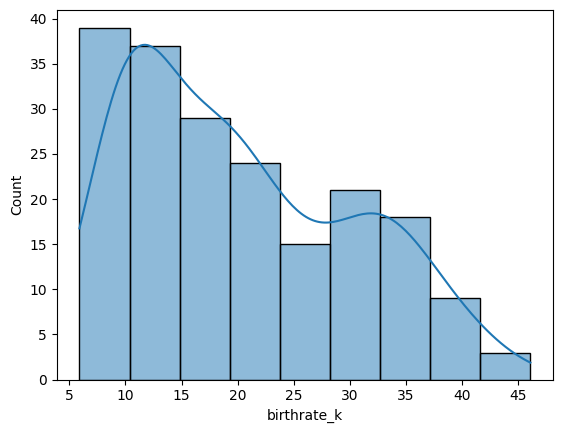

In [10]:
#1.¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?
sns.histplot( df, x="birthrate_k",kde=True
)

<Axes: xlabel='birthrate_k'>

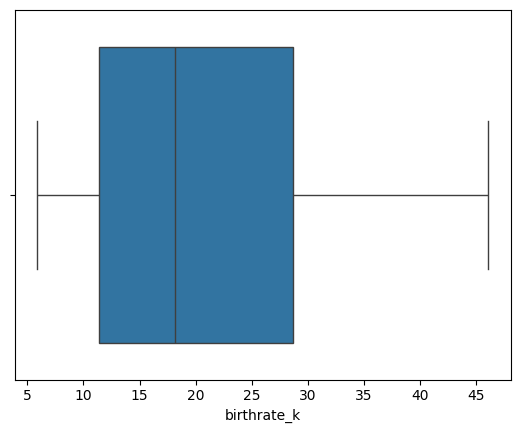

In [9]:
sns.boxplot( df, x="birthrate_k"
)

In [14]:
#2.¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.
# A mayor mortalidad infantil, menor es la esperanza de vida.

<Axes: xlabel='infantmortality_k', ylabel='lifeexpectancy_i'>

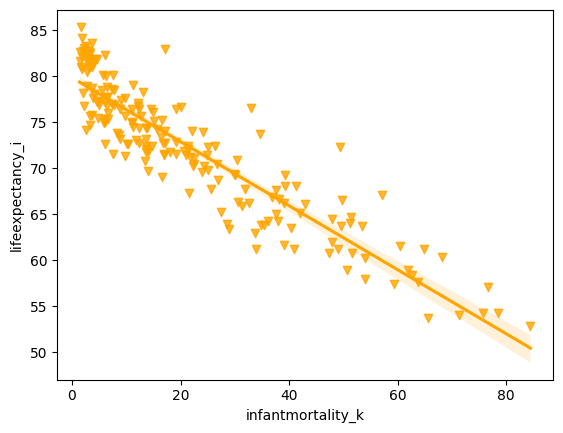

In [13]:
sns.regplot(x = 'infantmortality_k', 
                y = 'lifeexpectancy_i', 
                data = df, 
               
                marker= "v", 
                color = "orange")

In [16]:
#3.¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
df_country= df.groupby("Continent")["country"].count().reset_index()
df_country.head(5)

,Continent,country
0,Africa,12
1,America,36
2,Asia,96
3,Europa,43
4,Oceania,8


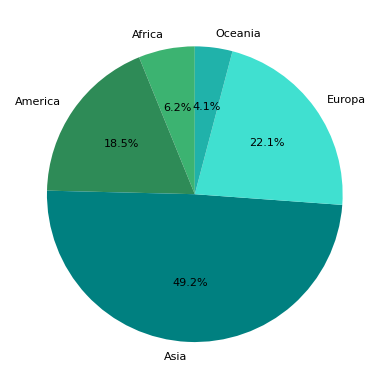

In [19]:
colores = [ "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.pie("country",labels="Continent", data=df_country,autopct=  '%1.1f%%', colors=colores,textprops={'fontsize': 8}, 
        startangle=90);

In [20]:
#4.¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. s
europa = df["Continent"]== "Europa"

df_europa= df[europa]
df_europa.head(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.120,56.9,2854191.0,36.60,12.330,1747593.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.630,36.4,77142.0,34.84,8.058,67873.0
9,Austria,109.0,AT,32.4,Vienna,EUR,46.9,103.1,Vienna,German,60.70,25.4,47.516231,14.550072,Europa,1.20,81.600000,83871.0,21000.0,9.70,43.0,61448.0,118.060,1.50,1.47,4.463147e+11,85.10,2.9,5.0,2.612,17.9,8877067.0,51.40,4.670,5194416.0
15,Belarus,47.0,BY,42.0,Minsk,BYN,42.6,100.5,Minsk,Russian,64.10,14.7,53.709807,27.953389,Europa,0.60,74.200000,207600.0,155000.0,9.90,375.0,58280.0,163.306,5.60,1.45,6.308046e+10,87.40,2.6,2.0,1.490,34.5,9466856.0,53.30,4.590,7482982.0
16,Belgium,383.0,BE,44.6,City of Brussels,EUR,22.6,103.9,Brussels,French,53.60,24.0,50.503887,4.469936,Europa,1.43,81.600000,30528.0,32000.0,10.30,32.0,96889.0,117.110,1.40,1.62,5.296067e+11,79.70,2.9,5.0,10.310,17.6,11484055.0,55.40,5.590,11259082.0


<Axes: xlabel='lifeexpectancy_i'>

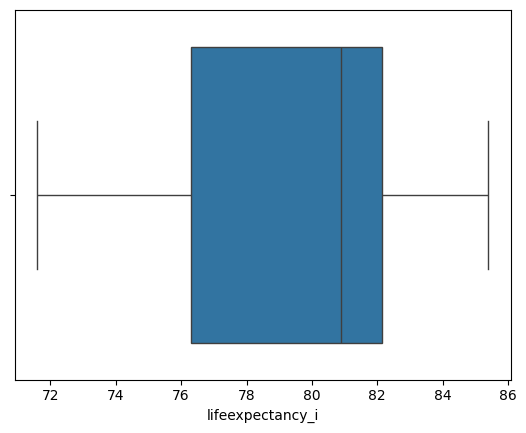

In [21]:
sns.boxplot(df_europa, x="lifeexpectancy_i")
#la mediana se situaría en torno a los 81 y los valores intercuartilicos entre 76 y 82 años.No se observan valores atípicos.

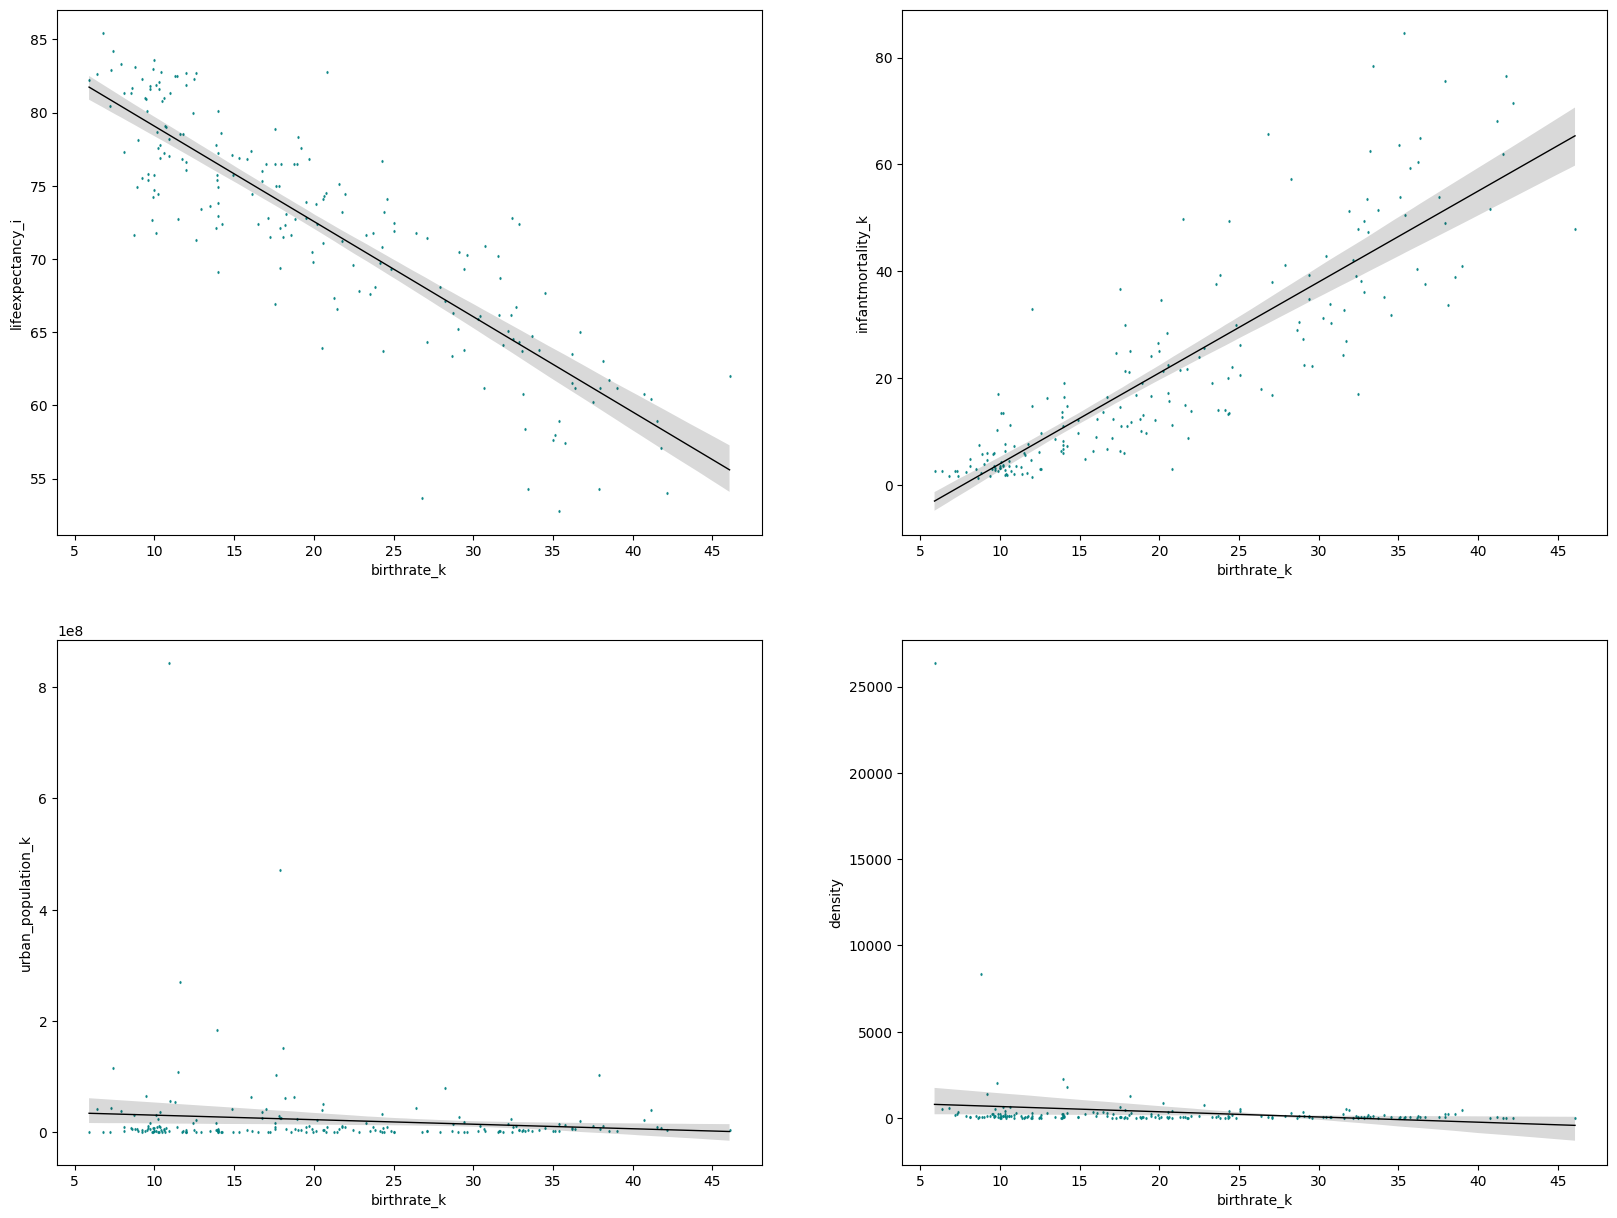

In [25]:
#5.¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.
lista =["lifeexpectancy_i",'infantmortality_k', 'urban_population_k',"density"]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
axes = axes.flat
for indice, element in enumerate(lista):
    sns.regplot(x = 'birthrate_k', y = element, data = df, 
                marker = "d", 
                line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
                scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
                ax = axes[indice] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
                )


In [26]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice_i', 'lifeexpectancy_i',
       'landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k',
       'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gdp_k',
       'grosstertiaryeducationenrollment_k', 'infantmortality_k',
       'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

<Axes: xlabel='forestedarea', ylabel='country'>

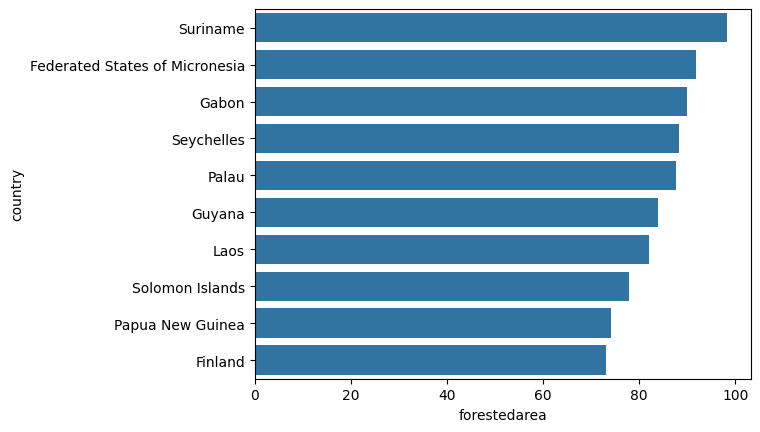

In [36]:
#6.¿Cuáles son los 10 países con la mayor área forestal?
df_forest=df.sort_values(by =["forestedarea"], ascending=False).head(10)
sns.barplot(data =df_forest, x="forestedarea", y="country")

<Axes: xlabel='birthrate_k', ylabel='Continent'>

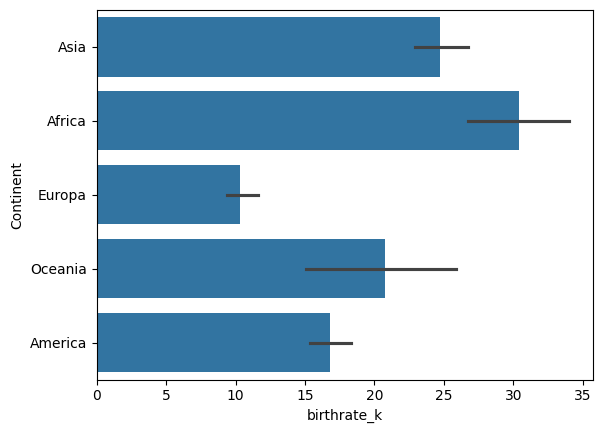

In [37]:
#7.¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?


df_natalidad=df.sort_values(by =["birthrate_k"], ascending=False)
sns.barplot(data =df_natalidad, x="birthrate_k", y="Continent")

In [38]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice_i', 'lifeexpectancy_i',
       'landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k',
       'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gdp_k',
       'grosstertiaryeducationenrollment_k', 'infantmortality_k',
       'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

''

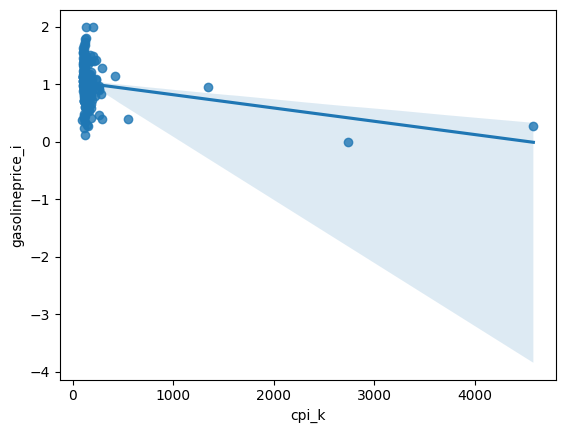

In [50]:
#8.¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.
sns.regplot(data=df,x="cpi_k",y="gasolineprice_i")
;


In [ ]:
#9.¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.
#10.Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
            #Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
            #Un histograma de la tasa de impuestos total.
            #Un gráfico de barras que resuma la tasa de impuestos total por continente.